# CSE 676 (B) - Spring 2024
## Deep Learning
<i>by <b>`Prof. (Dr.) Alina Vereshchaka`</b></i>
<br>
<br>
<br>
TEAM 🔻</br>
`SOUBHIK SINHA` (soubhiks)</br>
`SHIRISHA REDDY BANDARI` (shirisha)</br></br>

##### <b>Assignment 1 - CNN, RNN and LSTM Architectures</b> - From Data to ML and NN Models
Final Submission : `Mar. 7, 2024`
<br>
<br>
NOTE : Components to be completed for the FINAL Submission 🔻<br>
1. PART 1<br>
2. PART 2 (Partially)<br>
3. PART 5.1 (CNN)
4. PART 3<br>
5. PART 4<br>
6. PART 5.2

### <b>Part III : Time-Series Forecasting using RNN</b>

In this part, we work on time-series forecasting using RNN and LSTM methods.
The expected accuracy for this part is more than <b>`75%`</b> for the final model.

DATASETS<br>
Choose ONE dataset from the following real-world time-series datasets:<br>

    • Energy Consumption: electricity consumption data collected from 
    multiple households<br>
    • Air Quality Dataset: Hourly air quality data with various features 
    like temperature,humidity, and gas concentrations<br>
    • Web Traffic Dataset: Time-series data representing the number of 
    visits or page views to websites.<br>
    • Electric Grid Stability Dataset: Time-series data representing 
    the stability status of an electrical grid<br>
    • Taxi Trip Duration Dataset: Historical data of taxi trip durations 
    with features like pickup/dropoff coordinates, timestamps, and 
    other related information.<br>
    • Retail Sales Dataset: sales figures of a retail store or chain over 
    time, typically including features such as product categories, 
    promotions, and seasonality.

In [410]:
# We will be going with the dataset : Air Quality Dataset

In [411]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <b>STEPS:</b>

1. Select one dataset from the list above.<br>
    a. Read, preprocess, and print the main statistics about the dataset

In [412]:
# Dataset selected : Air Quality Dataset

In [413]:
# Loading the dataset

df = pd.read_csv('AirQualityUCI.csv')

In [414]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [415]:
# Displaying the first few rows of the DataFrame
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [417]:
# Descriptive Statistics

df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [418]:
# Shape of the dataset

df.shape

(9471, 17)

In [419]:
# Attribute datatypes

df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [420]:
# Listing the column names

df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [421]:
# Convertng 'Date' and 'Time' columns to datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [422]:
# Setting 'DateTime' as index
df.set_index('DateTime', inplace=True)

In [423]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
DateTime,,,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [424]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
DateTime,,,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
# Counting the number of NaN values in each attribute
nan_counts = df.isna().sum()
print(nan_counts)

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [426]:
df.shape

(9471, 17)

In [427]:
# We can see that the last 114 rows have nothing but 'NaN' values

df.tail(114)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
DateTime,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
# Getting rid of the last 2 attrubutes

df = df.drop(columns = ['Unnamed: 15','Unnamed: 16'])

In [429]:
# Getting rid of the last 114 rows full of 'NaN' values

df = df.dropna(axis=0, how='all', inplace=False, subset=None)

In [430]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [431]:
# We have also noticed that many columns have the value
# '-200' repeated numerous times - they are nothing but
# 'NaN' values - thus, we need to get rid of them as well
# and will replace those with the atribute's mean value

# Replacing -200 with NaN for easier handling
df.replace(-200, pd.NA, inplace=True)

# Calculating frequency of -200 in each column
frequency_of_minus_200 = (df == -200).sum()

print("Frequency of -200 in each column:")
print(frequency_of_minus_200)

Frequency of -200 in each column:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [432]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04-04-2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04-04-2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [433]:
# Excluding non-numeric columns
numeric_columns = df.drop(columns = ['Date', 'Time']).columns
print(numeric_columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


In [434]:
# Replacing NaN values with the mean of each column
for column in numeric_columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)

In [435]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.000000,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.000000,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.000000,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.000000,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.000000,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04-04-2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04-04-2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


In [436]:
from sklearn.impute import SimpleImputer

# Handling Missing Values in the attributes ('mean' value imputation)
# Excluding 'Date' and 'Time' columns from imputation
imputer = SimpleImputer(strategy='mean')
columns_to_impute = [col for col in df.columns if col not in ['Date', 'Time']]
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [437]:
# Printing main statistics
print(df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.316068   212.791672    63.870229     7.302650     261.560236   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.200000   941.000000   218.811816     4.600000     743.000000   
50%       2.152750  1075.000000   218.811816     8.600000     923.000000   
75%       2.600000  1221.000000   218.811816    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     193.426632    251.743954    43.920954    339.367559   390.612324   
min       2

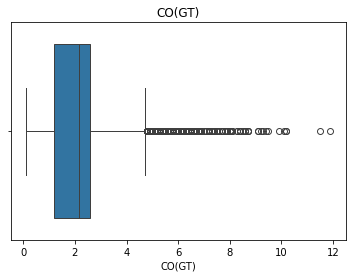

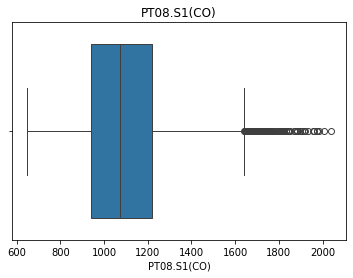

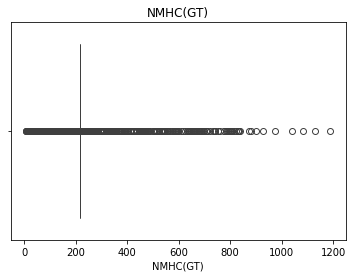

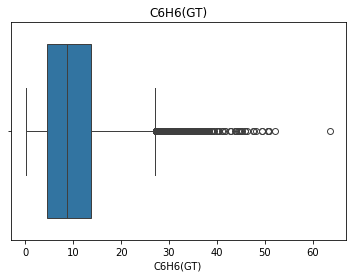

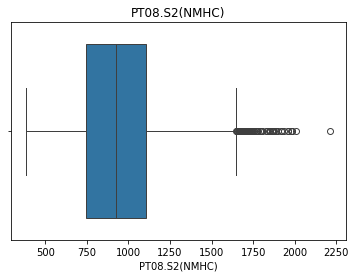

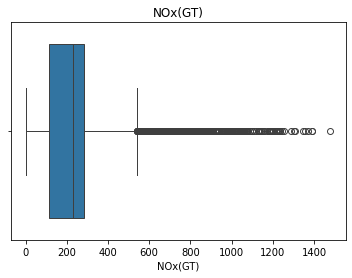

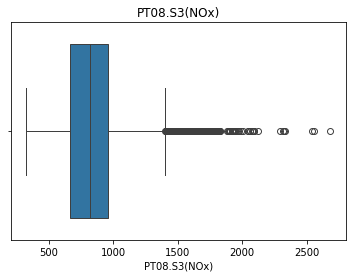

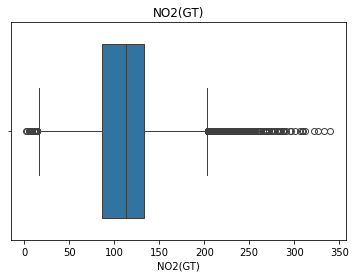

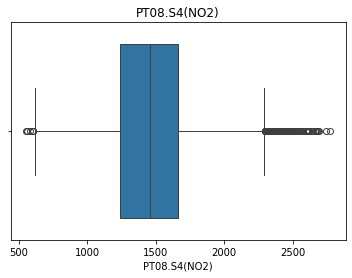

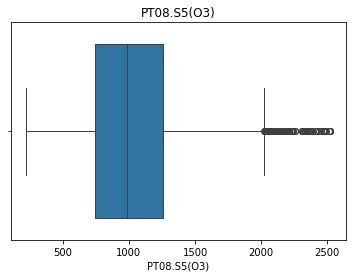

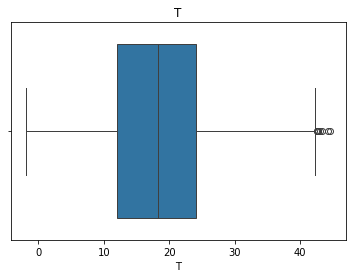

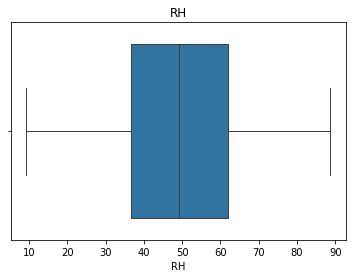

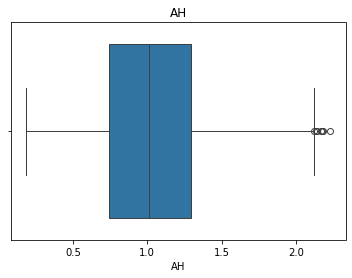

In [438]:
# Let us now handle the outliers in the dataset using BoxPlots, IQR 
# (Inter Quartile Range) and 'mean' value of the exisiting values of 
# the attributes

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = None  # Replacing outliers with NaN
    return df

# Visualizing outliers using boxplots
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        sns.boxplot(x=df[column])
        plt.title(column)
        plt.show()

# Handling outliers and replacing them with NaN
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df = handle_outliers(df, column)
    
# Replacing NaN values with the mean of existing values
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [439]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,218.811816,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,218.811816,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,218.811816,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,218.811816,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,218.811816,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,04-04-2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,04-04-2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


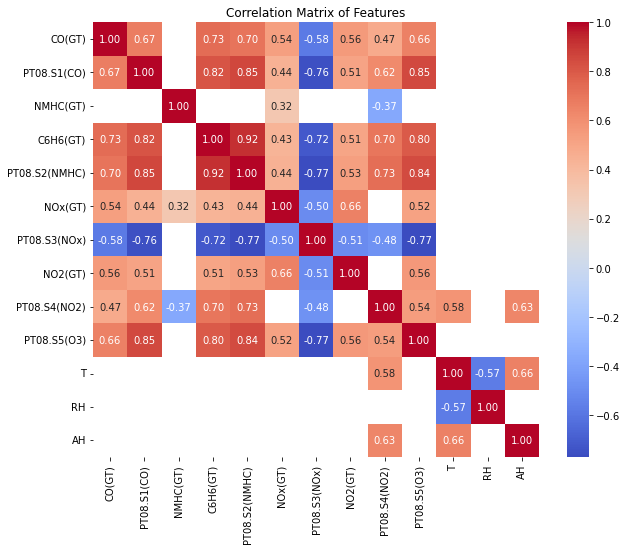

In [440]:
# Lets have a correlation matrix

'''
Lets assume - that the attributes showing
correlation between the range of -0.3 to 0.3 have poor correlation

So we need to delete these attributes from the dataset

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/

'''

# Computing the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))

# Highlight cells with correlation coefficient between -0.3 and 0.3
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            mask=(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3))

plt.title('Correlation Matrix of Features')
plt.show()

In [441]:
# Let us delete those attrbutes
# which shoes less (or no) correlation with other attributes

df = df.drop(columns=['NMHC(GT)', 'T', 'RH', 'AH'])

In [442]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
DateTime,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0
2004-10-03 19:00:00,10-03-2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0
2004-10-03 20:00:00,10-03-2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0
2004-10-03 21:00:00,10-03-2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0
2004-10-03 22:00:00,10-03-2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0
...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0
2005-04-04 11:00:00,04-04-2005,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0
2005-04-04 12:00:00,04-04-2005,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0


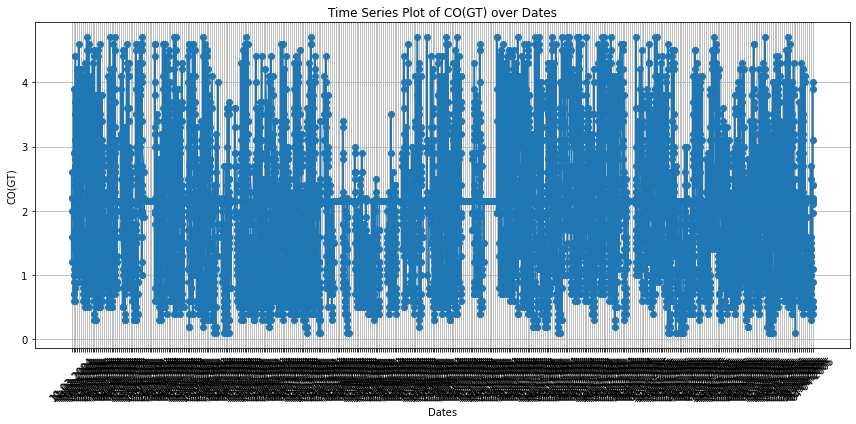

In [443]:
# Lets have a look to some of the valid visualizations

'''
VISUALIZATION #1
'''

# Time Series Plot of CO(GT) over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CO(GT)'], marker='o', linestyle='-')
plt.title('Time Series Plot of CO(GT) over Dates')
plt.xlabel('Dates')
plt.ylabel('CO(GT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

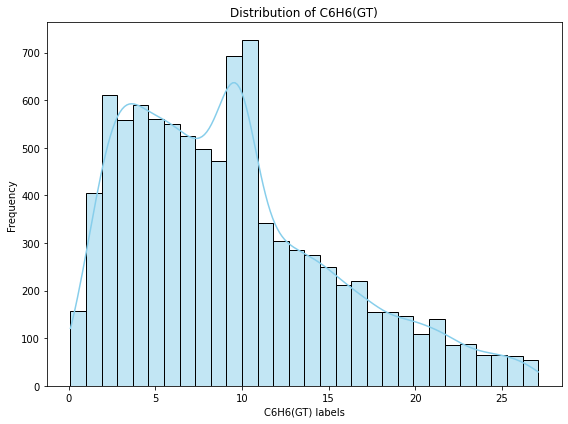

In [444]:
'''
VISUALIZATION #2
'''

# Distribution of C6H6(GT)
plt.figure(figsize=(8, 6))
sns.histplot(df['C6H6(GT)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of C6H6(GT)')
plt.xlabel('C6H6(GT) labels')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

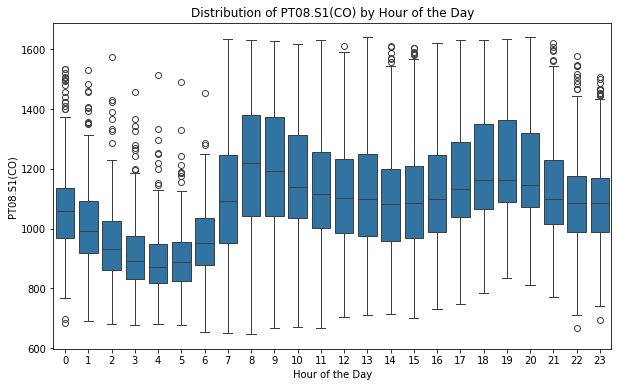

In [445]:
'''
VISUALIZATION #3
'''

# Creating a new column for hour of the day
df['Hour'] = df.index.hour

# Distribution of PT08.S1(CO) by Hour of the Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='PT08.S1(CO)', data=df)
plt.title('Distribution of PT08.S1(CO) by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('PT08.S1(CO)')
plt.show()

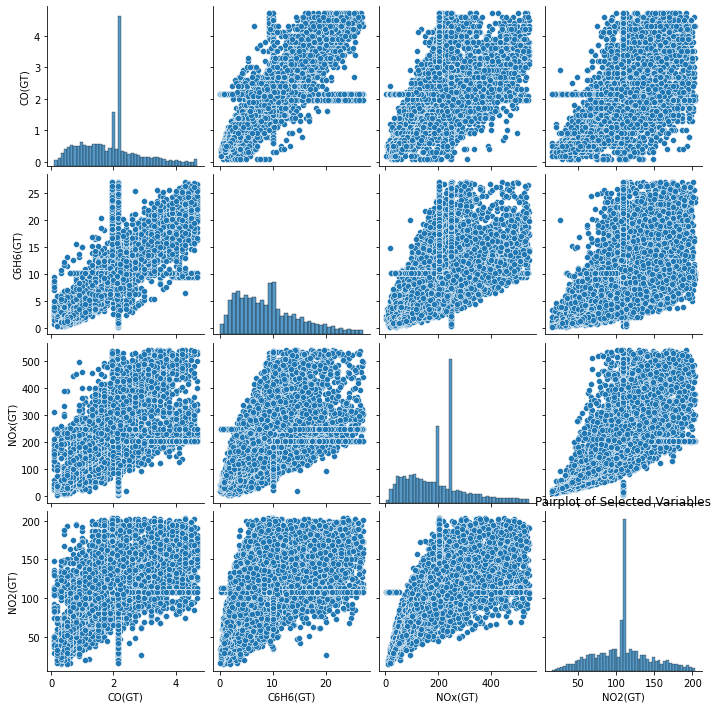

In [446]:
'''
VISUALIZATION #4
'''

# Pairplot of Selected Variables
selected_variables = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']  # Selecting variables for pairplot
sns.pairplot(df[selected_variables])
plt.title('Pairplot of Selected Variables')
plt.show()

In [447]:
# Normalizing the dataset using StandardScaler

from sklearn.preprocessing import StandardScaler

# Selecting numerical columns to normalize
numerical_columns = [col for col in df.columns if col not in ['Date', 'Time']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalizing the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [448]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Hour
DateTime,,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,0.663200,1.379448,0.425634,0.462966,-0.320939,1.178028,0.121837,0.781017,0.716199,0.939133
2004-10-03 19:00:00,10-03-2004,19:00:00,0.042093,1.032607,0.007018,0.096417,-0.882082,1.746434,-0.455009,0.362876,-0.094450,1.083583
2004-10-03 20:00:00,10-03-2004,20:00:00,0.249129,1.593673,-0.059961,0.031969,-0.632685,1.582656,0.149306,0.350300,0.184895,1.228033
2004-10-03 21:00:00,10-03-2004,21:00:00,0.249129,1.461057,-0.026471,0.068221,-0.267497,1.351440,0.369057,0.441474,0.538185,1.372483
2004-10-03 22:00:00,10-03-2004,22:00:00,-0.371978,0.930595,-0.478576,-0.382916,-0.632685,1.895761,0.204244,0.145946,0.283488,1.516933
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,1.180789,1.144820,0.693548,0.684507,2.404611,-1.312361,2.236942,-0.218749,1.978731,-0.216467
2005-04-04 11:00:00,04-04-2005,11:00:00,0.456165,0.374629,0.341911,0.386434,1.344675,-0.999256,1.934784,-0.564580,0.718938,-0.072017
2005-04-04 12:00:00,04-04-2005,12:00:00,0.456165,0.267516,0.509357,0.531443,0.810253,-1.004073,1.824909,-0.636890,0.234191,0.072433


In [449]:
# For the time being - we are dropping the 'Hour' column - as it was created
# for visualization

df = df.drop(columns = 'Hour', axis=1)

In [450]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
DateTime,,,,,,,,,,,
2004-10-03 18:00:00,10-03-2004,18:00:00,0.663200,1.379448,0.425634,0.462966,-0.320939,1.178028,0.121837,0.781017,0.716199
2004-10-03 19:00:00,10-03-2004,19:00:00,0.042093,1.032607,0.007018,0.096417,-0.882082,1.746434,-0.455009,0.362876,-0.094450
2004-10-03 20:00:00,10-03-2004,20:00:00,0.249129,1.593673,-0.059961,0.031969,-0.632685,1.582656,0.149306,0.350300,0.184895
2004-10-03 21:00:00,10-03-2004,21:00:00,0.249129,1.461057,-0.026471,0.068221,-0.267497,1.351440,0.369057,0.441474,0.538185
2004-10-03 22:00:00,10-03-2004,22:00:00,-0.371978,0.930595,-0.478576,-0.382916,-0.632685,1.895761,0.204244,0.145946,0.283488
...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,04-04-2005,10:00:00,1.180789,1.144820,0.693548,0.684507,2.404611,-1.312361,2.236942,-0.218749,1.978731
2005-04-04 11:00:00,04-04-2005,11:00:00,0.456165,0.374629,0.341911,0.386434,1.344675,-0.999256,1.934784,-0.564580,0.718938
2005-04-04 12:00:00,04-04-2005,12:00:00,0.456165,0.267516,0.509357,0.531443,0.810253,-1.004073,1.824909,-0.636890,0.234191


In [451]:
# List of attrbutes

df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')

In [452]:
'''
from sklearn.model_selection import train_test_split

# Separating features (X) and target variables (y)
X = df.drop(columns=["CO(GT)"])
y = df["CO(GT)"]

# Performing the train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.111150, shuffle=False)

# Printing the shapes of the splits to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
'''
# Rather than going for a traditional train_test_split method
# Because this is a Time-Series dataset - we have to take a different approach

# Sorting the dataset by DateTime
df_sorted = df.sort_values(by='DateTime')

# Calculating the number of rows for each set
total_rows = len(df_sorted)
train_rows = int(0.8 * total_rows)
val_rows = int(0.1 * total_rows)

# Slicing the dataset
train_set = df_sorted[:train_rows]
val_set = df_sorted[train_rows:train_rows+val_rows]
test_set = df_sorted[train_rows+val_rows:]

# Printing the shape in each set
print("Train set rows:", train_set.shape)
print("Validation set rows:", val_set.shape)
print("Test set rows:", test_set.shape)


Train set rows: (7485, 11)
Validation set rows: (935, 11)
Test set rows: (937, 11)


In [453]:
# Creating the components

X_train = train_set.drop(columns = 'CO(GT)')
y_train = train_set['CO(GT)']
X_val = val_set.drop(columns = 'CO(GT)')
y_val = val_set['CO(GT)']
X_test = test_set.drop(columns = 'CO(GT)')
y_test = test_set['CO(GT)']

In [454]:
# Printing the shapes

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_val shape : ", X_val.shape)
print("y_val shape : ", y_val.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (7485, 10)
y_train shape :  (7485,)
X_val shape :  (935, 10)
y_val shape :  (935,)
X_test shape :  (937, 10)
y_test shape :  (937,)


<br>
<br>

2. Building RNN:<br>
    a. Build the RNN model architecture, that consists of at least three RNN
    layers.

In [455]:
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        
        # Define additional layers if needed
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, output_size)
        
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)
        
        # Reshape output for fully connected layer
        out = out[:, -1, :]  # Take the last time step output
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [456]:
# Defining the input size, hidden size, number of layers, and output size
input_size = 8
hidden_size = 64
num_layers = 3
output_size = 1

In [457]:
# Checking if GPU is available

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [458]:
'''
from torch.utils.data import DataLoader, TensorDataset

from torch.utils.data import DataLoader, TensorDataset

# Extracting features from date and time columns
X_train_features = X_train.drop(columns=["Date", "Time"])
X_val_features = X_val.drop(columns=["Date", "Time"])
X_test_features = X_test.drop(columns=["Date", "Time"])

# Converting data to PyTorch tensors and removing first two dimensions
X_train_tensor = torch.tensor(X_train_features.values, dtype=torch.float32).squeeze(0).squeeze(0)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_features.values, dtype=torch.float32).squeeze(0).squeeze(0)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_features.values, dtype=torch.float32).squeeze(0).squeeze(0)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Creating datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Defining batch size
batch_size = 64

# Creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
'''

from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, sequence_length):
        self.X = X.values.astype(np.float32)
        self.y = y.values.astype(np.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.X) - self.sequence_length

    def __getitem__(self, idx):
        return (
            torch.tensor(self.X[idx:idx+self.sequence_length]),
            torch.tensor(self.y[idx+self.sequence_length])
        )

def create_sequences(X, y, sequence_length, batch_size):
    dataset = TimeSeriesDataset(X, y, sequence_length)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Defining sequence length and batch size
sequence_length = 24
batch_size = 64

# Creating data loaders
train_loader = create_sequences(X_train.drop(columns = ['Date', 'Time']), y_train, sequence_length, batch_size)
val_loader = create_sequences(X_val.drop(columns = ['Date', 'Time']), y_val, sequence_length, batch_size)
test_loader = create_sequences(X_test.drop(columns = ['Date', 'Time']), y_test, sequence_length, batch_size)

In [459]:
# Iterating over the data loaders and printing out the dimensions of the batches
for loader_name, loader in zip(["Train", "Validation", "Test"], [train_loader, val_loader, test_loader]):
    print(f"{loader_name} DataLoader:")
    for i, (inputs, targets) in enumerate(loader):
        print(f"Batch {i + 1}: Input shape: {inputs.shape}, Target shape: {targets.shape}")
    print()

Train DataLoader:
Batch 1: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 2: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 3: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 4: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 5: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 6: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 7: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 8: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 9: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 10: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 11: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 12: Input shape: torch.Size([64, 24, 8]), Target shape: torch.Size([64])
Batch 13: Input shape: torch.Size([64, 24, 

In [460]:
# Instantiating the model
model_base = RNNModel(input_size, hidden_size, num_layers, output_size).to(device)

In [461]:
import torch.optim as optim

# Defining loss function and optimizer
criterion_base = nn.MSELoss()
optimizer_base = optim.Adam(model_base.parameters(), lr=0.001)

In [462]:
from sklearn.metrics import r2_score

num_epochs = 30

# Initialize lists to store training and validation metrics
train_losses_base = []
val_losses_base = []
train_r2_scores_base = []
val_r2_scores_base = []

for epoch in range(num_epochs):
    # Training
    model_base.train()
    train_loss = 0.0
    predictions_train = []
    targets_train = []
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer_base.zero_grad()
        outputs = model_base(inputs)
        targets = targets.unsqueeze(1)  # Adjusting target tensor dimensions
        loss = criterion_base(outputs, targets)
        loss.backward()
        optimizer_base.step()

        train_loss += loss.item() * inputs.size(0)

        # Calculating score
        predictions_train.extend(outputs.cpu().detach().numpy().flatten())
        targets_train.extend(targets.cpu().numpy().flatten())
        
    train_loss /= len(train_loader.dataset)
    train_losses_base.append(train_loss)
    train_r2 = r2_score(targets_train, predictions_train)
    train_r2_scores_base.append(train_r2)
    
    # Validation
    model_base.eval()
    val_loss = 0.0
    predictions_val = []
    targets_val = []
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_base(inputs)
            loss = criterion_base(outputs, targets.unsqueeze(1))
            val_loss += loss.item() * inputs.size(0)
            
            # Calculating R2 score
            predictions_val.extend(outputs.cpu().detach().numpy().flatten())
            targets_val.extend(targets.cpu().numpy().flatten())
            
    val_loss /= len(val_loader.dataset)
    val_losses_base.append(val_loss)
    val_r2 = r2_score(targets_val, predictions_val)
    val_r2_scores_base.append(val_r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train R2: {train_r2:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val R2: {val_r2:.4f}")

Epoch [1/30], Train Loss: 0.5360, Train R2: 0.4519, Val Loss: 0.5277, Val R2: 0.4528
Epoch [2/30], Train Loss: 0.4842, Train R2: 0.5048, Val Loss: 0.5220, Val R2: 0.4588
Epoch [3/30], Train Loss: 0.4691, Train R2: 0.5203, Val Loss: 0.5656, Val R2: 0.4136
Epoch [4/30], Train Loss: 0.4608, Train R2: 0.5288, Val Loss: 0.5951, Val R2: 0.3829
Epoch [5/30], Train Loss: 0.4547, Train R2: 0.5350, Val Loss: 0.5552, Val R2: 0.4243
Epoch [6/30], Train Loss: 0.4510, Train R2: 0.5388, Val Loss: 0.4948, Val R2: 0.4870
Epoch [7/30], Train Loss: 0.4400, Train R2: 0.5500, Val Loss: 0.5100, Val R2: 0.4712
Epoch [8/30], Train Loss: 0.4344, Train R2: 0.5558, Val Loss: 0.5033, Val R2: 0.4781
Epoch [9/30], Train Loss: 0.4220, Train R2: 0.5684, Val Loss: 0.5417, Val R2: 0.4383
Epoch [10/30], Train Loss: 0.4195, Train R2: 0.5710, Val Loss: 0.5150, Val R2: 0.4660
Epoch [11/30], Train Loss: 0.4137, Train R2: 0.5769, Val Loss: 0.5310, Val R2: 0.4494
Epoch [12/30], Train Loss: 0.4100, Train R2: 0.5807, Val Loss: 

In [463]:
# Testing
model_base.eval()
test_loss_base = 0.0
true_values_base = []
predicted_values_base = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_base(inputs)
        loss = criterion_base(outputs, targets.unsqueeze(1))
        test_loss_base += loss.item() * inputs.size(0)
        
        # Collecting true and predicted values
        true_values_base.extend(targets.cpu().squeeze().tolist())
        predicted_values_base.extend(outputs.cpu().squeeze().tolist())
            
test_loss_base /= len(test_loader.dataset)

# Calculating R2 score
test_r2_base = r2_score(true_values_base, predicted_values_base)

print(f"Test Loss: {test_loss_base:.4f}, Test R2: {test_r2_base:.4f}")

Test Loss: 0.7360, Test R2: 0.3566


In [482]:
# Let us try to create different setups 
# (different set of hyperparameters)

import pickle

# Defining function to train the model with given hyperparameters
def train_model(input_size, hidden_size, num_layers, output_size, train_loader, val_loader, num_epochs=30, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Instantiating the model
    model = RNNModel(input_size, hidden_size, num_layers, output_size).to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Initializing lists to store training and validation metrics
    train_losses = []
    val_losses = []
    train_r2_scores = []
    val_r2_scores = []

    best_r2_score = 0.0
    best_model = None

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        predictions_train = []
        targets_train = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            targets = targets.unsqueeze(1)  
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            predictions_train.extend(outputs.cpu().detach().numpy().flatten())
            targets_train.extend(targets.cpu().numpy().flatten())
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        train_r2 = r2_score(targets_train, predictions_train)
        train_r2_scores.append(train_r2)
        
        # Validation
        model.eval()
        val_loss = 0.0
        predictions_val = []
        targets_val = []
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets.unsqueeze(1))
                val_loss += loss.item() * inputs.size(0)
                predictions_val.extend(outputs.cpu().detach().numpy().flatten())
                targets_val.extend(targets.cpu().numpy().flatten())
        
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        val_r2 = r2_score(targets_val, predictions_val)
        val_r2_scores.append(val_r2)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train R2: {train_r2:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val R2: {val_r2:.4f}")
        
        # Saving the model with the best validation R2 score
        if val_r2 > best_r2_score:
            best_r2_score = val_r2
            best_model = model.state_dict()

    return best_model, train_losses, val_losses, train_r2_scores, val_r2_scores

# Defining function to test the model
def test_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    test_loss = 0.0
    predictions_test = []
    targets_test = []
    criterion = nn.MSELoss()
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            test_loss += loss.item() * inputs.size(0)
            predictions_test.extend(outputs.cpu().detach().numpy().flatten())
            targets_test.extend(targets.cpu().numpy().flatten())
    
    test_loss /= len(test_loader.dataset)
    test_r2 = r2_score(targets_test, predictions_test)
    
    return test_loss, test_r2, predictions_test, targets_test

# Defining hyperparameters to try
hyperparameters_to_try = [
    {'hidden_size': 64, 'num_layers': 3, 'learning_rate': 0.001},
    {'hidden_size': 128, 'num_layers': 3, 'learning_rate': 0.001},
    {'hidden_size': 64, 'num_layers': 4, 'learning_rate': 0.001},
    {'hidden_size': 128, 'num_layers': 4, 'learning_rate': 0.001}
]

results_dict = {}
best_testing_r2 = 0.0
best_model_state = None

for idx, params in enumerate(hyperparameters_to_try):
    print(f"Training model with hyperparameters set {idx+1}: {params}")
    
    # Training the model
    best_model, train_losses, val_losses, train_r2_scores, val_r2_scores = train_model(input_size, params['hidden_size'], params['num_layers'], output_size, train_loader, val_loader)
    
    # Testing the model
    model = RNNModel(input_size, params['hidden_size'], params['num_layers'], output_size).to(device)
    model.load_state_dict(best_model)
    test_loss, test_r2, predictions_test, targets_test = test_model(model, test_loader)
    
    # Saving results to dictionary
    results_dict[f"Setup {idx+1}"] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_r2_scores': train_r2_scores,
        'val_r2_scores': val_r2_scores,
        'test_loss': test_loss,
        'test_r2': test_r2,
        'true_labels': targets_test,
        'predicted_labels': predictions_test
    }
    
    print(f"Testing R2 score for setup {idx+1}: {test_r2:.4f}")
    
    # Saving the best model with the best testing R2 score
    if test_r2 > best_testing_r2:
        best_testing_r2 = test_r2
        best_model_state = best_model

# Saving the model with the best testing R2 score (in pickle file)
if best_model_state is not None:
    torch.save(best_model_state, "best_model_rnn_r2.pt")

# Saving results dictionary to a pickle file
with open('results_dict_rnn.pkl', 'wb') as f:
    pickle.dump(results_dict, f)

Training model with hyperparameters set 1: {'hidden_size': 64, 'num_layers': 3, 'learning_rate': 0.001}
Epoch [1/30], Train Loss: 0.5314, Train R2: 0.4565, Val Loss: 0.5234, Val R2: 0.4573
Epoch [2/30], Train Loss: 0.4746, Train R2: 0.5146, Val Loss: 0.5242, Val R2: 0.4565
Epoch [3/30], Train Loss: 0.4632, Train R2: 0.5263, Val Loss: 0.5720, Val R2: 0.4070
Epoch [4/30], Train Loss: 0.4498, Train R2: 0.5401, Val Loss: 0.5407, Val R2: 0.4394
Epoch [5/30], Train Loss: 0.4406, Train R2: 0.5494, Val Loss: 0.5485, Val R2: 0.4313
Epoch [6/30], Train Loss: 0.4344, Train R2: 0.5558, Val Loss: 0.6026, Val R2: 0.3752
Epoch [7/30], Train Loss: 0.4289, Train R2: 0.5614, Val Loss: 0.5608, Val R2: 0.4186
Epoch [8/30], Train Loss: 0.4242, Train R2: 0.5662, Val Loss: 0.4771, Val R2: 0.5054
Epoch [9/30], Train Loss: 0.4152, Train R2: 0.5754, Val Loss: 0.5097, Val R2: 0.4715
Epoch [10/30], Train Loss: 0.4081, Train R2: 0.5827, Val Loss: 0.4811, Val R2: 0.5012
Epoch [11/30], Train Loss: 0.4078, Train R2: 

In [483]:
# Printing the dictionary values

results_dict

{'Setup 1': {'train_losses': [0.5314365651664713,
   0.4746101397225595,
   0.46320942312682734,
   0.44976271469045653,
   0.4405924289791502,
   0.434357827521572,
   0.42890699548705974,
   0.4242167135830652,
   0.41516265613018805,
   0.4081018521628835,
   0.40780447263881264,
   0.4020407574975032,
   0.39472729389876177,
   0.3873763941253355,
   0.38071481974798205,
   0.3724713847051116,
   0.36555020298048374,
   0.3611231367416443,
   0.34750551851524963,
   0.34091554162905247,
   0.33372562682519985,
   0.32287067756498167,
   0.3061317267242633,
   0.3076690406450045,
   0.28137343013083677,
   0.27856219030148766,
   0.2633554296309148,
   0.2537516840556211,
   0.24835419176315401,
   0.23983863519169885],
  'val_losses': [0.5233762138139796,
   0.5241730334860826,
   0.5719546946225653,
   0.5406621219232498,
   0.5485269277470041,
   0.6025986015207812,
   0.5607677248647001,
   0.4770660659811499,
   0.5097384061234973,
   0.4810937648121795,
   0.4759185149300635,


<br>
<br>

11. Discuss the results and provide relevant graphs:<br>
    • Report training R2-score, training loss, validation R2-score, validation loss,testing R2-score, and testing loss.<br>
    • Plot the training and validation R2-score over time (epochs).<br>
    • Plot the training and validation loss over time (epochs).<br>
    • Generate a confusion matrix using the model's predictions on the test set.<br>
    • Calculate and report other evaluation metrics such as Precision, recall and F1 score.

In [484]:
'''
Report training R2-score, training loss, validation R2-score, 
validation loss,testing R2-score, and testing loss.
'''

for setup, metrics in results_dict.items():
    print(f"Setup: {setup}")
    
    print("Training Losses: ", metrics['train_losses'])
    
    print("Training R2 Scores: ", metrics['train_r2_scores'])
    
    print("Validation Losses: ", metrics['val_losses'])
    
    print("Validation R2 Scores: ", metrics['val_r2_scores'])
        
    print(f"Testing R2-score: {metrics['test_r2']:.4f}")
    
    print(f"Testing Loss: {metrics['test_loss']:.4f}")
    print()

Setup: Setup 1
Training Losses:  [0.5314365651664713, 0.4746101397225595, 0.46320942312682734, 0.44976271469045653, 0.4405924289791502, 0.434357827521572, 0.42890699548705974, 0.4242167135830652, 0.41516265613018805, 0.4081018521628835, 0.40780447263881264, 0.4020407574975032, 0.39472729389876177, 0.3873763941253355, 0.38071481974798205, 0.3724713847051116, 0.36555020298048374, 0.3611231367416443, 0.34750551851524963, 0.34091554162905247, 0.33372562682519985, 0.32287067756498167, 0.3061317267242633, 0.3076690406450045, 0.28137343013083677, 0.27856219030148766, 0.2633554296309148, 0.2537516840556211, 0.24835419176315401, 0.23983863519169885]
Training R2 Scores:  [0.45652710721513856, 0.5146405767911482, 0.5262994997952818, 0.5400507561905509, 0.5494287353116221, 0.5558045453861424, 0.5613788308532097, 0.5661753356008702, 0.5754344613906421, 0.5826551830620068, 0.5829592999624114, 0.5888535576408884, 0.5963326574638117, 0.6038500465210017, 0.610662497012769, 0.6190926349544768, 0.6261705

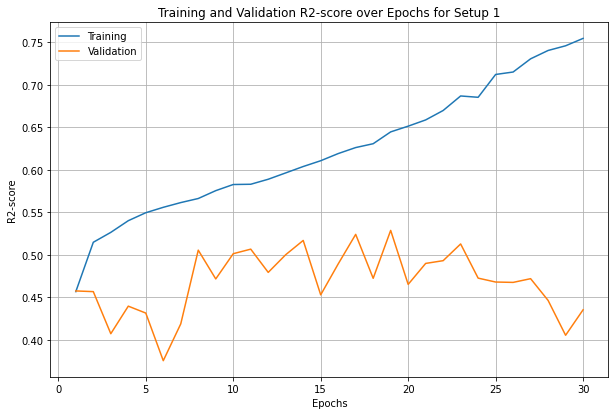

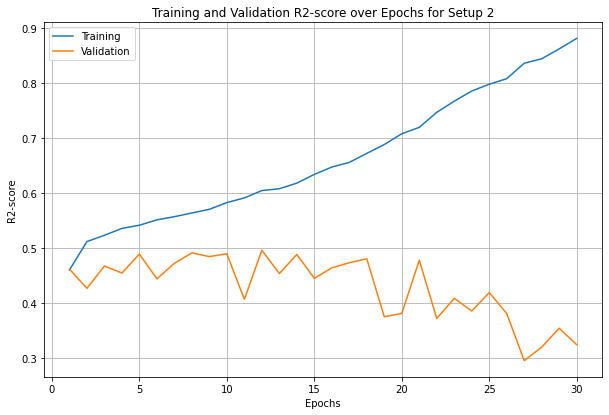

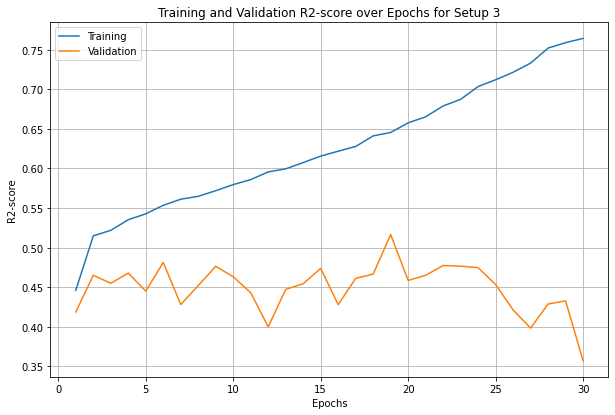

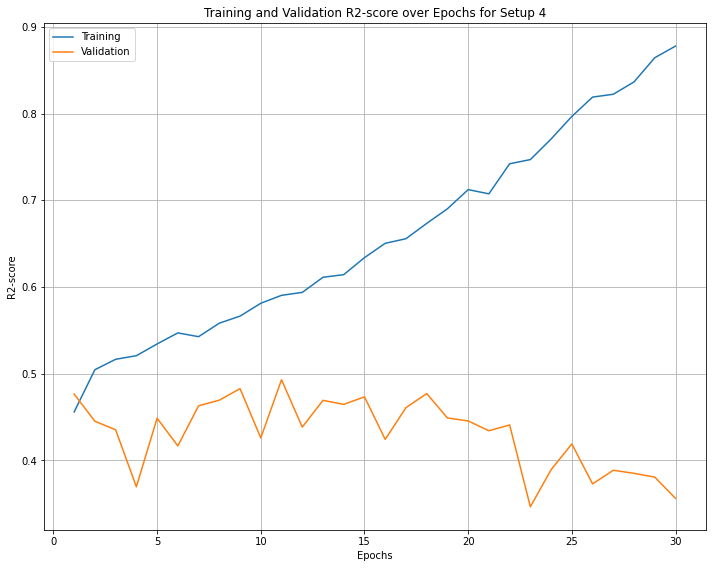

In [485]:
'''
Plot the training and validation R2-score over time (epochs).
'''

# Defining the epochs
epochs = range(1, len(results_dict['Setup 1']['train_r2_scores']) + 1)

# Plotting for each setup
for i, (setup, metrics) in enumerate(results_dict.items(), 1):
    plt.figure(figsize=(10, 30))
    plt.subplot(len(results_dict), 1, i)
    plt.plot(epochs, metrics['train_r2_scores'], label="Training")
    plt.plot(epochs, metrics['val_r2_scores'], label="Validation")

    # Adding labels and legend
    plt.xlabel('Epochs')
    plt.ylabel('R2-score')
    plt.title(f'Training and Validation R2-score over Epochs for {setup}')
    plt.legend()
    plt.grid(True)

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()

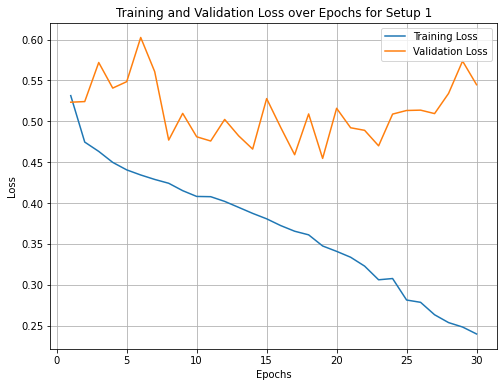

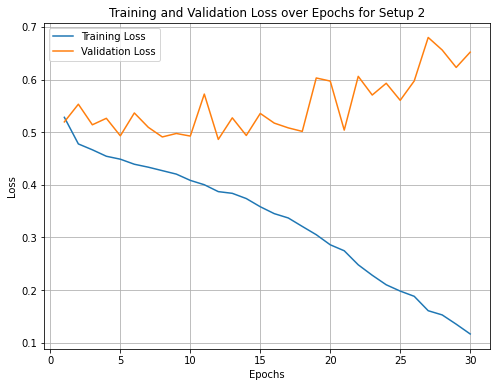

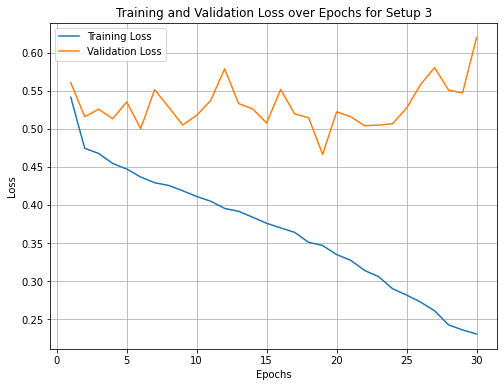

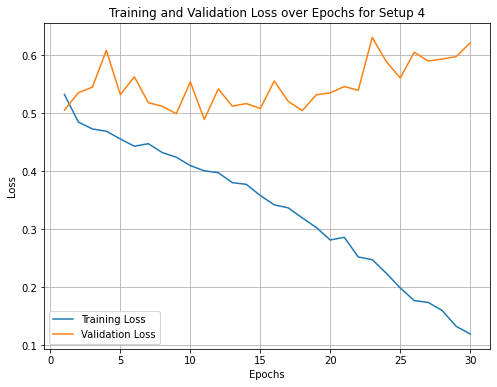

In [486]:
'''
Plot the training and validation loss over time (epochs).
'''

# Defining the epochs
epochs = range(1, len(results_dict['Setup 1']['train_losses']) + 1)

# Plotting for each setup
for setup, metrics in results_dict.items():
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, metrics['train_losses'], label="Training Loss")
    plt.plot(epochs, metrics['val_losses'], label="Validation Loss")

    # Adding labels and legend
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss over Epochs for {setup}')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

In [487]:
'''
Generate a confusion matrix using the model's predictions on the test set.
'''

# Because this a regression problem and confusion matrix is only
# useful in Classification problems - so CAN'T BE CREATED !!!

"\nGenerate a confusion matrix using the model's predictions on the test set.\n"

In [488]:
'''
Calculate and report other evaluation metrics such as Precision, 
recall and F1 score.
'''

# Again - because this is a Regression problem
# The above metrics won't be useful

'\nCalculate and report other evaluation metrics such as Precision, \nrecall and F1 score.\n'

In [490]:
# WE CAN SHOW THE PERFORMANCE OF THE MODEL SETUPS
# MAE (Mean Absolute Error), RMSE (Root Mean Sqaured Error),
# MAPE (Mean Absolute Percentage Error)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.subtract(y_true, y_pred)))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(np.divide(np.subtract(y_true, y_pred), y_true))) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.subtract(y_true, y_pred))))

for setup, data in results_dict.items():
    true_labels = np.array(data['true_labels'])
    predicted_labels = np.array(data['predicted_labels'])
    
    mae = mean_absolute_error(true_labels, predicted_labels)
    mape = mean_absolute_percentage_error(true_labels, predicted_labels)
    rmse = root_mean_squared_error(true_labels, predicted_labels)
    
    print(f"Setup: {setup}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"RMSE: {rmse}")
    print()

Setup: Setup 1
MAE: 0.6156160831451416
MAPE: 365471072256000.0
RMSE: 0.8143511414527893

Setup: Setup 2
MAE: 0.6810885667800903
MAPE: 279412683571200.0
RMSE: 0.8785285949707031

Setup: Setup 3
MAE: 0.6845824718475342
MAPE: 333149110272000.0
RMSE: 0.8697008490562439

Setup: Setup 4
MAE: 0.6811083555221558
MAPE: 309441462272000.0
RMSE: 0.8687067627906799



In [491]:
'''
BASE MODEL 🔽🔽🔽
'''

'''
Report training R2-score, training loss, validation R2-score, 
validation loss,testing R2-score, and testing loss.
'''

print("BASE MODEL🔻")
print("Training Losses: ", train_losses_base)
print("Training R2 Scores: ", train_r2_scores_base)
print("Validation Losses: ", val_losses_base)
print("Validation R2 Scores: ",  val_r2_scores_base)
print(f"Testing R2-score: {test_r2_base:.4f}")
print(f"Testing Loss: {test_loss_base :.4f}")

BASE MODEL🔻
Training Losses:  [0.5360060932249282, 0.4841944236064178, 0.4690788081481268, 0.46076887652263965, 0.4547475432082581, 0.4509882921188962, 0.4400207612345452, 0.43438486301727997, 0.4220348441030397, 0.41950290704153764, 0.41369188355546327, 0.41001908327136405, 0.4001685184730056, 0.389830195461197, 0.38340489919632054, 0.3808312089213768, 0.37000597343737535, 0.35696369776248354, 0.34953564774724855, 0.34406241096706974, 0.3322993269108556, 0.32292279201256274, 0.3098651779099806, 0.30562091753687654, 0.288288183317573, 0.28056681097240843, 0.2744286264727413, 0.26162267229565345, 0.24565068855352432, 0.23779615192243328]
Training R2 Scores:  [0.4518540851945263, 0.5048392169135082, 0.5202971832515509, 0.52879531872892, 0.5349530287980822, 0.5387974231981718, 0.550013356296738, 0.555776899136835, 0.5684066251056001, 0.570995908929119, 0.5769385475059212, 0.5806945294239407, 0.5907681971076384, 0.6013406688722343, 0.6079114900408684, 0.6105434699818979, 0.6216138850899917

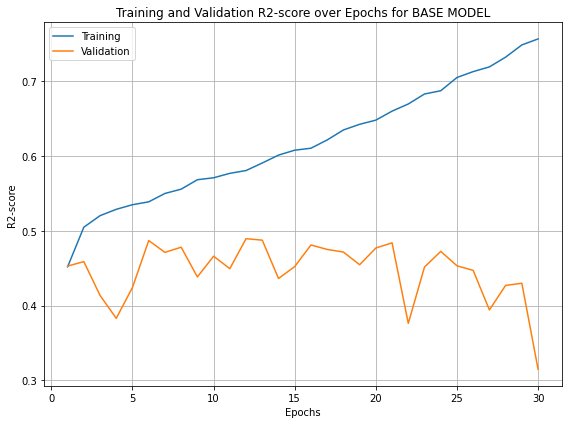

In [494]:
'''
Plot the training and validation R2-score over time (epochs).
'''

# Defining the epochs
epochs = range(1, len(train_r2_scores_base) + 1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_r2_scores_base, label="Training")
plt.plot(epochs, val_r2_scores_base, label="Validation")

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('R2-score')
plt.title(f'Training and Validation R2-score over Epochs for BASE MODEL')
plt.legend()
plt.grid(True)

# Adjusting layout
plt.tight_layout()

# Showing plot
plt.show()

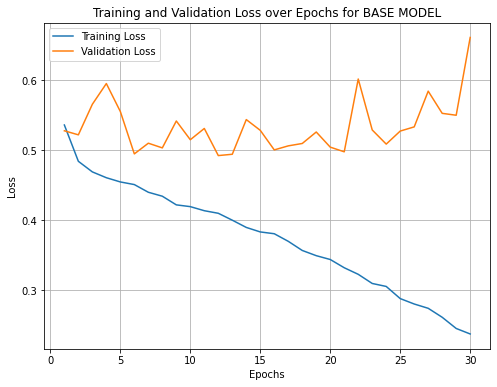

In [495]:
'''
Plot the training and validation loss over time (epochs).
'''

# Defining the epochs
epochs = range(1, len(train_r2_scores_base) + 1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses_base, label="Training Loss")
plt.plot(epochs, val_losses_base, label="Validation Loss")

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss over Epochs for BASE MODEL')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [498]:
# PERFORMANCE OF THE BASE MODEL - based on
# MAE (Mean Absolute Error), RMSE (Root Mean Sqaured Error),
# MAPE (Mean Absolute Percentage Error)

true_labels_base = np.array(true_values_base)
predicted_labels_base = np.array(predicted_values_base)
    
mae = mean_absolute_error(true_labels, predicted_labels)
mape = mean_absolute_percentage_error(true_labels, predicted_labels)
rmse = root_mean_squared_error(true_labels, predicted_labels)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")

MAE: 0.6811083555221558
MAPE: 309441462272000.0
RMSE: 0.8687067627906799
